# Import 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
import seaborn as sns

# Read Data

In [2]:
sbi_data = pd.read_csv('C:/Users/Asus/Downloads/SBI_Historical_Data.csv')

In [3]:
sbi_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 07, 2020",190.65,191.45,192.10,189.55,44.82M,-0.16%
1,"Aug 06, 2020",190.95,192.30,194.50,190.25,59.74M,-0.26%
2,"Aug 05, 2020",191.45,192.75,196.85,191.00,68.89M,-0.08%
3,"Aug 04, 2020",191.60,193.35,193.80,190.50,43.87M,-0.34%
4,"Aug 03, 2020",192.25,192.00,194.60,190.05,72.46M,0.42%


In [4]:
sbi_data.shape

(1385, 7)

In [5]:
sbi_data.describe()

,Price,Open,High,Low
count,1385.000000,1385.000000,1385.000000,1385.000000
mean,266.274404,266.903213,270.343682,262.757906
std,45.555277,45.590664,45.829745,45.248334
min,150.850000,151.950000,153.200000,148.250000
25%,245.650000,245.900000,248.800000,242.550000
50%,270.800000,271.150000,274.600000,267.400000
75%,296.150000,296.500000,300.750000,292.200000
max,372.400000,371.950000,373.800000,366.200000


In [6]:
sbi_data.describe(include='object')

,Date,Vol.,Change %
count,1385,1385,1385
unique,1385,1147,638
top,"Jun 13, 2018",11.93M,-0.02%
freq,1,4,13


In [7]:
# Convert Date column from object to Datetime64 (datatype)
sbi_data['Date']=pd.to_datetime(sbi_data['Date'])

In [8]:
sbi_data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-08-07,190.65,191.45,192.10,189.55,44.82M,-0.16%
1,2020-08-06,190.95,192.30,194.50,190.25,59.74M,-0.26%
2,2020-08-05,191.45,192.75,196.85,191.00,68.89M,-0.08%
3,2020-08-04,191.60,193.35,193.80,190.50,43.87M,-0.34%
4,2020-08-03,192.25,192.00,194.60,190.05,72.46M,0.42%


In [9]:
# take date column as index
sbi_data.set_index('Date',inplace=True)

In [10]:
data = sbi_data.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'],axis=1)

In [11]:
data.sort_index(inplace=True)

In [12]:
data.head()

,Price
Date,
2015-01-01,314.00
2015-01-02,315.25
2015-01-05,312.75
2015-01-06,299.90
2015-01-07,300.15


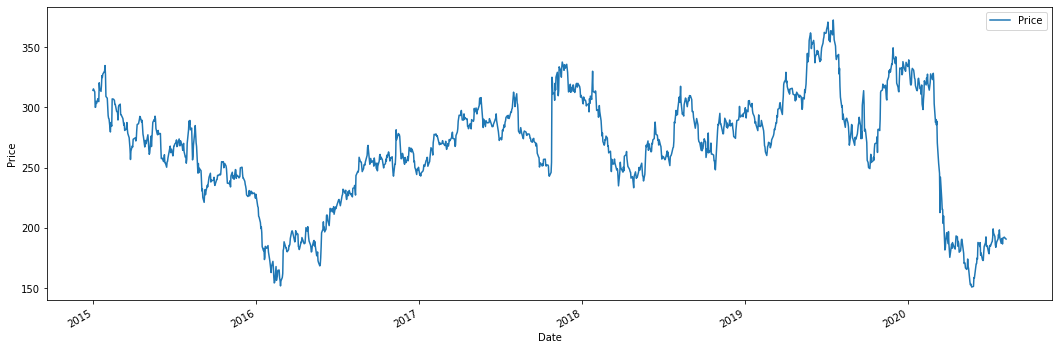

In [13]:
data.plot(figsize=(18,6))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Feature Selection

In [14]:
y = data['Price'].resample('MS').mean()

In [15]:
y.shape

(68,)

In [16]:
data.shape

(1385, 1)

In [17]:
# Check time series is stationary or not
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.460279
p-value: 0.125440
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591


H0 : Time series is non-stationary

We see that Statical value: -2.460279 is not less than 1% of Critical Values -3.534, So we can't reject the null hypothesis

And, We also see tha p-value 0.125440 is not less than 0.05, so that we can't reject the null hypothesis


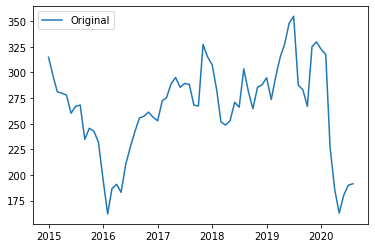

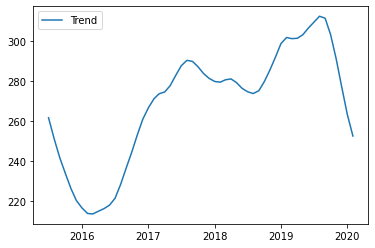

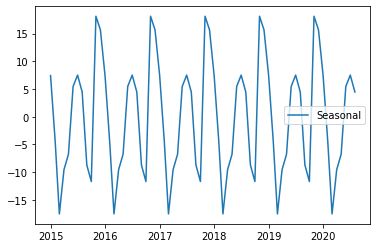

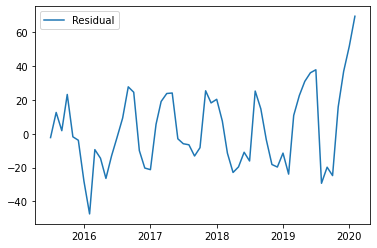

In [18]:
# Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.plot(y, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')
plt.show()

### try to make stationary

In [19]:
# make time series Stationary
data['Last Day Price'] = data['Price'].shift(periods=1,fill_value=0)
data['Price Diff'] = data['Price']-data['Last Day Price']
data['Price Diff'][0]=0

In [20]:
data.head()

,Price,Last Day Price,Price Diff
Date,,,
2015-01-01,314.00,0.00,0.00
2015-01-02,315.25,314.00,1.25
2015-01-05,312.75,315.25,-2.50
2015-01-06,299.90,312.75,-12.85
2015-01-07,300.15,299.90,0.25


In [21]:
yy = data.drop(['Price','Last Day Price'],axis=1)

In [22]:
yy = yy.resample('MS').mean()

In [23]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(yy)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.799213
p-value: 0.000000
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590


H0 : Time series is non-stationary

We see that Statical value: -7.799213 is less than 1% of Critical Values -3.532, So we reject the null hypothesis

And, We also see tha p-value is less than 0.05, so that we reject the null hypothesis



# Decomposing

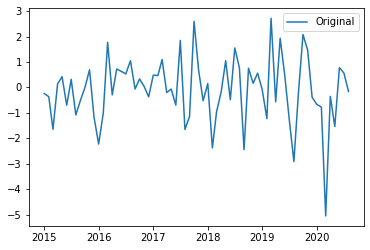

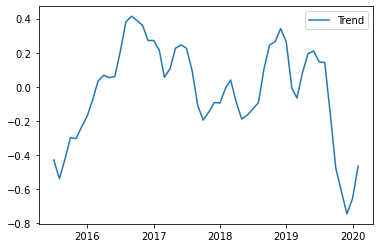

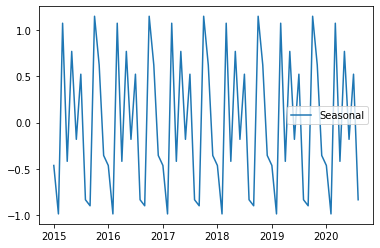

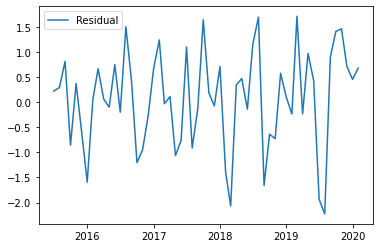

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(yy)

plt.plot(yy, label = 'Original')
plt.legend(loc = 'best')

trend = decomposition.trend
plt.show()
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc='best')
plt.show()

# Forcasting using ARIMA

We will use ARIMA for forecasting our time series. ARIMA is also denoted as ARIMA(p,d,q) where p,d,q accounts for seasonality, trend and noise in the time series data

In [25]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


# Parameter Selection

We use “grid search” to find the optimal set of parameters that yields the best performance for our model

In [26]:
list = []
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(yy, order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            list.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:227.56467488382293
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:193.541756184263
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:230.83125529103012
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:161.85395065083463
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:197.84732287381104
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:193.959758188298
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:163.47797798999702


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:162.7024495458011
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:227.03267406154657
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:192.5601341161025
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:229.40381075008426
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:160.59141089135622
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:199.84726301987513
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:192.66411645360688
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:164.63162959402933


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:160.8662715566621
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:268.34125629852264
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:228.52803400147846
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:261.1856100814841
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:188.14124287405377
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:231.7774046394694
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:229.61584491016094
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:195.60450320052226


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:194.4099352028706
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:227.47727453687705
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:191.89320202099552
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:226.2487835686897
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:163.25284420224665
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:201.31579635659335
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:192.65891984115757
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:166.24919460337136
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:157.46333035426392
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:229.46450154580825
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:195.5337396044729
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:232.65195336822893
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:163.8507171696533
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:194.5953801285853
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:195.95912054061833
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:161.65925339428853


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:163.94451315651366
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:228.14431435587088
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:194.38658298682665
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:231.31233899790476
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:162.39542608387342
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:196.2709991715112
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:194.78105516340722
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:163.50587026800582


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:162.9684750097747
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:255.4172962245977
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:217.79055208355834
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:250.31726883142602
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:177.07109609872833
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:217.47089031542737
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:218.86802805426055
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:179.08740187311543


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:181.44988491802735
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:229.40795451298516
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:193.88607219845406
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:227.9901776269689
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:165.20947881804355
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:198.3094682286851
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:194.6447418551692
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:163.77761354082088
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:162.42920234241984


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### We are selecting those parameter which has minimum AIC score

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:157.46333035426392

In [27]:
# Find the minimum ARIMA
np.min(list)

268.34125629852264

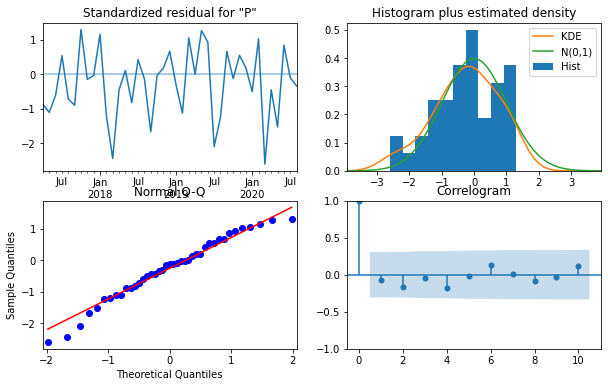

In [28]:
results.plot_diagnostics(figsize=(10,6))
plt.show()

# Fitting And model

We compare predicted sales to real sales of the time series to understand the accuracy of our forecasts

In [29]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0153      0.173      0.089      0.929      -0.323       0.354
ar.S.L12      -0.7236      0.173     -4.176      0.000      -1.063      -0.384
ma.S.L12      -0.2610      0.295     -0.885      0.376      -0.839       0.317
sigma2       612.5815    128.930      4.751      0.000     359.883     865.280


# Validation and Forcasting

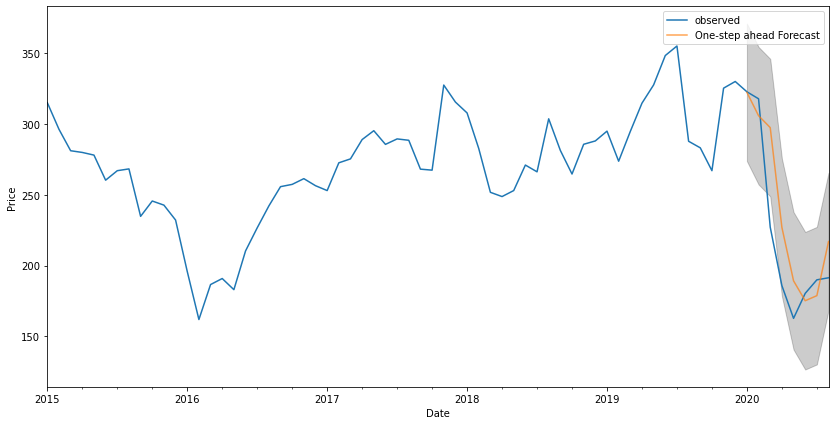

In [30]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

The above plot indicates the observed value and the rolling forecast predications (A rolling forecast is an add/drop process for predicting the future over a set period of time). The predicated values align well with the true values.

# Calculate MSE and RMSE

In [31]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1034.0
The Root Mean Squared Error of our forecasts is 32.16


# Visualizing the Forecast

            lower Price  upper Price
2020-09-01   122.609731   219.630421
2020-10-01    89.700923   227.965449
2020-11-01   101.770055   271.537967
2020-12-01    87.626790   283.905186
2021-01-01    78.790613   298.402255
2021-02-01    48.416012   289.109089
2021-03-01    47.185428   307.256651
2021-04-01    52.194589   330.296954
2021-05-01    53.757819   348.791392
2021-06-01    64.359077   375.403596
2021-07-01    61.324962   387.595673
2021-08-01    12.440589   353.257932


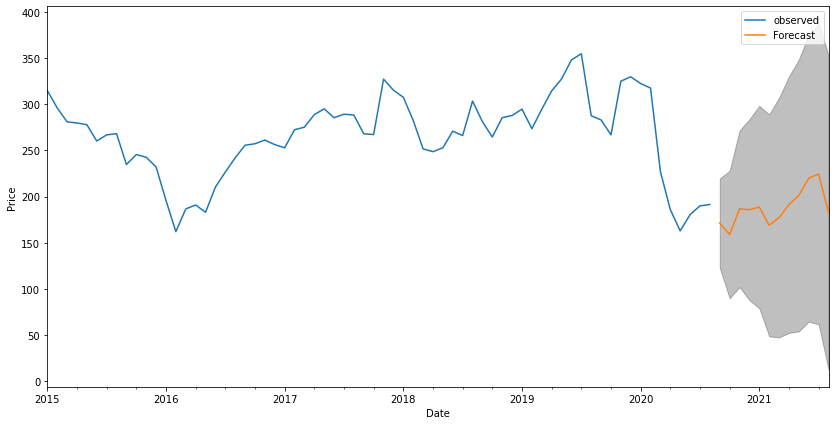

In [32]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
print(pred_ci)
plt.legend()
plt.show()